Stephanie Chiang  
DATA 620 Summer 2025  
### Assignment Week 3 Part 2:
# Datasets: 2-Mode network

The below analysis is based on the Davis Club dataset, from the [NetworkX documentation Example](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html):

> Davis Southern Club Women

> Shows how to make unipartite projections of the graph and compute theproperties of those graphs.

> These data were collected by Davis et al. in the 1930s.
> They represent observed attendance at 14 social events by 18 Southern women.
> The graph is bipartite (clubs, women).

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [10]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [11]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


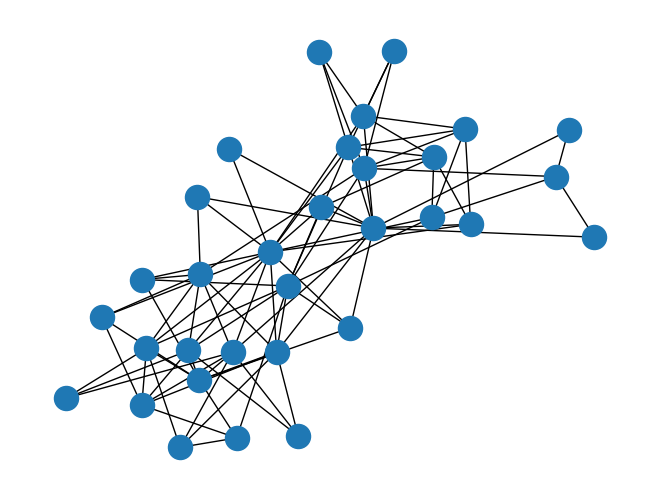

In [12]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

### What can you infer about the relationships between (1) the women, and (2) the social events?  

This dataset includes nodes for 18 women and 14 social events. Edges represent attendance at events. 

For women, by checking the results from the `weighted_projected_graph` function, we can see the co-occurrence or shared attendance with other women at events. This can reveal clusters that represent groups or cliques, but also determine which women are more influential or connected in the network. For example, Evelyn Jefferson has the highest number of shared contacts with other women at 50. Below, we can see explicitly how this means that not only has she attended many events, but also shared attendance multiple times with all 17 other woman in the network.

In [14]:
for u, v, data in W.edges(data=True):
    print(f"{u} - {v}: {data['weight']} shared events")

Evelyn Jefferson - Sylvia Avondale: 2 shared events
Evelyn Jefferson - Theresa Anderson: 7 shared events
Evelyn Jefferson - Ruth DeSand: 3 shared events
Evelyn Jefferson - Nora Fayette: 2 shared events
Evelyn Jefferson - Pearl Oglethorpe: 3 shared events
Evelyn Jefferson - Katherina Rogers: 2 shared events
Evelyn Jefferson - Flora Price: 1 shared events
Evelyn Jefferson - Eleanor Nye: 3 shared events
Evelyn Jefferson - Charlotte McDowd: 3 shared events
Evelyn Jefferson - Frances Anderson: 4 shared events
Evelyn Jefferson - Myra Liddel: 2 shared events
Evelyn Jefferson - Laura Mandeville: 6 shared events
Evelyn Jefferson - Brenda Rogers: 6 shared events
Evelyn Jefferson - Dorothy Murchison: 2 shared events
Evelyn Jefferson - Helen Lloyd: 1 shared events
Evelyn Jefferson - Verne Sanderson: 2 shared events
Evelyn Jefferson - Olivia Carleton: 1 shared events
Laura Mandeville - Sylvia Avondale: 2 shared events
Laura Mandeville - Theresa Anderson: 6 shared events
Laura Mandeville - Nora Faye

For social events, events are connected if at least one woman attended both. We can copy the code from the NetworkX documentation and apply it to the events nodes next. 

The list of edges below can reveal whether certain events appealed to similar groups of women or might even have been planned by official clubs. Events with high shared attendance might indicate that they were more popular or significant in the social calendar. Meanwhile, events with low shared attendance might mean that they were more niche or exclusive, or better for bringing together new people who had not met before.

In [16]:
E = bipartite.weighted_projected_graph(G, clubs)

for u, v, data in E.edges(data=True):
    print(f"{u} - {v}: {data['weight']} women attended both")

E1 - E3: 3 women attended both
E1 - E6: 3 women attended both
E1 - E7: 2 women attended both
E1 - E4: 2 women attended both
E1 - E8: 3 women attended both
E1 - E2: 2 women attended both
E1 - E5: 3 women attended both
E1 - E9: 1 women attended both
E2 - E3: 3 women attended both
E2 - E6: 3 women attended both
E2 - E7: 2 women attended both
E2 - E4: 2 women attended both
E2 - E8: 3 women attended both
E2 - E5: 3 women attended both
E2 - E9: 2 women attended both
E3 - E6: 5 women attended both
E3 - E7: 4 women attended both
E3 - E4: 4 women attended both
E3 - E8: 5 women attended both
E3 - E5: 6 women attended both
E3 - E9: 2 women attended both
E4 - E6: 3 women attended both
E4 - E7: 3 women attended both
E4 - E8: 3 women attended both
E4 - E5: 4 women attended both
E4 - E9: 2 women attended both
E5 - E7: 6 women attended both
E5 - E8: 7 women attended both
E5 - E6: 6 women attended both
E5 - E9: 3 women attended both
E6 - E7: 5 women attended both
E6 - E13: 1 women attended both
E6 - E1